### Concrete data set

We have 1030 observations on 9 variables. We try to estimate the Complete compressive strength(CRS) using:

| Variable   | Description |
| ---------- | ---------------- |
| Cement in kg  | Cement in a m3 mixture | 
| Blast Furnace Slag in kg  | Blast Furnace Slag  in a m3 mixture | 
| Fly Ash in kg | Fly Ash in a m3 mixture | 
| Water in kg |  in a m3 mixture | 
| Superplasticizer in kg | Water in a m3 mixture | 
| Coarse Aggregate in kg  |Coarse Aggregate in a m3 mixture | 
| Fine Aggregate in kg  | Fine Aggregatein a m3 mixture | 
| Age in  Day  | Days (1-365) | 

In [1]:
import pandas                       as     pd
import numpy                        as     np
import scipy.stats                  as     stats

import seaborn                      as     sns
import matplotlib.pyplot            as     plt
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

from   statsmodels.compat           import lzip

from   sklearn                      import model_selection

from sklearn.linear_model           import  LinearRegression
from sklearn.linear_model           import  Lasso
from sklearn.linear_model           import  Ridge
from sklearn.linear_model           import  ElasticNet

from   sklearn.tree                 import DecisionTreeRegressor
from   sklearn.ensemble             import RandomForestRegressor
from   sklearn.neural_network       import MLPRegressor
from   sklearn                      import ensemble
from   sklearn.ensemble             import GradientBoostingRegressor

from   sklearn.neighbors            import KNeighborsRegressor
from   sklearn.svm                  import SVR
from   sklearn.pipeline             import Pipeline
from   sklearn.preprocessing        import StandardScaler

from   sklearn.model_selection      import GridSearchCV
from   sklearn.model_selection      import cross_val_score, cross_val_predict, KFold


from   sklearn.metrics              import mean_squared_error, mean_absolute_error
from   statsmodels.compat           import lzip

import eli5
from   eli5.sklearn                 import PermutationImportance  
from   IPython.display              import Image

D:\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
def  report_rmse_mape(lm, y, X, title):
    
    '''
        Reports rmse and mape for the given model, pair of dataset (y and X) and title
    ''' 
    rmse_     = (np.sqrt(mean_squared_error(y_true = y, y_pred = lm.predict(X))))
    mape_    = mean_absolute_percentage_error(y,       y_pred = lm.predict(X))
    print("\n")
    print(title)
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse_ ))
    print('MAPE is {}'.format(mape_))

#### End


In [4]:
def feature_importances(model_name, model, imp): 
    '''
    Prints the relative importances and plots 
    '''
    feature_names = ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer','CA', 'FA', 'Age']
    print('\n Feature importances from model %s\n' %model_name)
    print(lzip(imp, feature_names))
    indices           =  np.argsort(imp)
    plt.title('Feature importances %s' %model_name)
    plt.barh(range(len(indices)), imp[indices], color = 'b', align = 'center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative importance')
    plt.show()
###

In [5]:
train_df       =   pd.read_csv('train.csv', usecols = \
                               ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',\
                                'CA', 'FA', 'Age', 'CMS'])
test_df        =   pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)
print(train_df.head().T)   
print(test_df.head().T)   

(823, 9)
(206, 9)
                        0       1       2       3        4
Cement             275.10  516.00  393.00  183.90   246.80
Blast                0.00    0.00    0.00  122.60     0.00
Fly Ash            121.40    0.00    0.00    0.00   125.10
Water              159.50  162.00  192.00  203.50   143.30
Superplasticizer     9.90    8.20    0.00    0.00    12.00
CA                1053.60  801.00  940.00  959.20  1086.80
FA                 777.50  802.00  758.00  800.00   800.90
Age                 56.00   28.00   90.00   28.00     3.00
CMS                 56.85   41.37   48.79   24.05    23.52
                      0      1       2        3       4
Cement            318.8  362.6  322.00   212.00  446.00
Blast             212.5  189.0    0.00     0.00   24.00
Fly Ash             0.0    0.0    0.00   124.80   79.00
Water             155.7  164.9  203.00   159.00  162.00
Superplasticizer   14.3   11.6    0.00     7.80   11.60
CA                852.1  944.7  974.00  1085.40  967.00


In [6]:
X_train  = train_df[['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer','CA', 'FA', 'Age']]
X_test   = test_df[['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer','CA', 'FA', 'Age']]
y_train  = train_df['CMS'] 
y_test   = test_df['CMS']
 

In [7]:
df_names      = ['x_train shape', 'x_test shape', 'y_train shape', 'y_test shape']
shapes        = (X_train.shape, X_test.shape,  y_train.shape, y_test.shape)
types         = (type(X_train), type(X_test), type(y_train),type(y_test))
lzip(df_names,shapes, types)

[('x_train shape', (823, 8), pandas.core.frame.DataFrame),
 ('x_test shape', (206, 8), pandas.core.frame.DataFrame),
 ('y_train shape', (823,), pandas.core.series.Series),
 ('y_test shape', (206,), pandas.core.series.Series)]

### Performance of the model evaluation

### Prediction Accuracy

Prediction error or residuals is the difference between the predicted target variable values and the actual target variable vaues.

We shall use cross-validation 
We shall evaluate algorithms using Mean Squared Error (MSE), which indicates how bad the predictions are. Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 

Most popular measure to evaluate the model performance is Root Mean Square Error (RMSE) which is the arithmatic mean of the sum of the residuals. The model with low RMSE is the best model among many other models.

In [8]:
# Spot-Check Algorithms

models = [] 

### Linear models

models.append(('OLS',    LinearRegression())) 
models.append(('Ridge', Ridge())) 
models.append(('LASSO', Lasso())) 
models.append(('EN',    ElasticNet())) 

# Non-linear models

models.append(('KNN',  KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR',  SVR()))

In [9]:
seed                  =   12345
nfold                 =   10
scoring               = 'neg_mean_squared_error'

In [10]:
model_results               = [] 
model_names                 = [] 

for name, model in models: 
    
    kfold                = KFold(n_splits = nfold, random_state = seed) 
    results_from_cv      = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    rmse_results         = np.sqrt(results_from_cv * -1)
    
    model_results.append(rmse_results) 
    model_names.append(name) 
    msg_metric           = "%s: %f (%f)" % (name, np.mean(rmse_results), np.std(rmse_results)) 
    print(msg_metric)

OLS: 10.382512 (1.067312)
Ridge: 10.382509 (1.067314)
LASSO: 10.382853 (1.068851)
EN: 10.381404 (1.068607)
KNN: 9.280750 (1.080013)
CART: 6.558750 (0.916357)
SVR: 16.323930 (1.412210)


### Look at the distribution of scores across all cross-validation folds by algorithm.

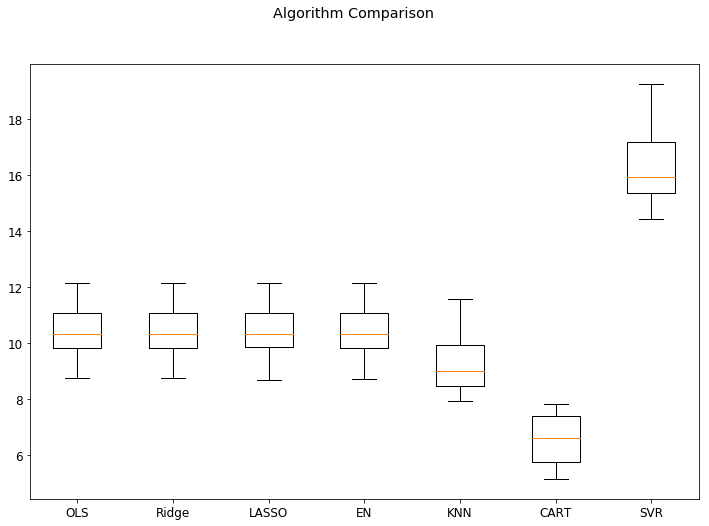

In [11]:
# Visually compare Algorithms 
fig                    = plt.figure(figsize = (12,8)) 
fig.suptitle('Algorithm Comparison') 
ax                     = fig.add_subplot(111) 
plt.boxplot(model_results) 

ax.set_xticklabels(model_names) 
plt.show()

The diﬀering scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN.
Use a standardized data and repeat the above

In [12]:
# Standardize the dataset 
pipelines = [] 

pipelines.append(('ScaledOLS', Pipeline([('Scaler', StandardScaler()),('OLS', LinearRegression())]))) 
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())]))) 
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]))) 
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 

model_results               = [] 
model_names                 = [] 

for name, model in pipelines: 
   
    kfold                = KFold(n_splits = nfold, random_state = seed) 
    results_from_cv      = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    rmse_results         = np.sqrt(results_from_cv * -1)
    
    model_results.append(rmse_results) 
    model_names.append(name) 
    msg_metric           = "%s: %f (%f)" % (name, np.mean(rmse_results), np.std(rmse_results)) 
    print(msg_metric)


ScaledOLS: 10.382512 (1.067312)
ScaledRidge: 10.382240 (1.067817)
ScaledLASSO: 10.999966 (1.063323)
ScaledEN: 11.769208 (1.112166)
ScaledKNN: 9.034930 (0.830133)
ScaledCART: 6.639248 (0.827409)
ScaledSVR: 10.139932 (1.178352)


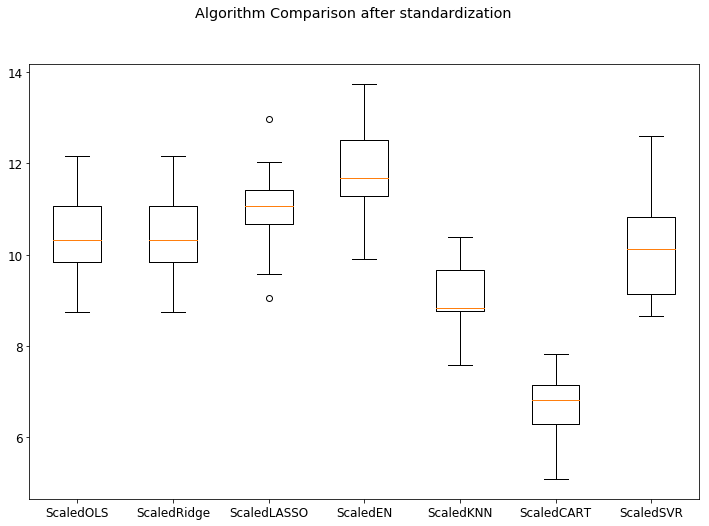

In [13]:
# Visually compare Algorithms 
fig                    = plt.figure(figsize = (12,8)) 
fig.suptitle('Algorithm Comparison after standardization') 
ax                     = fig.add_subplot(111) 
plt.boxplot(model_results) 

ax.set_xticklabels(model_names) 
plt.show()

 ### Observation
 
 Scaling did have an eﬀect on SVR, driving the error lower than the other models such as OLS, Ridge, LASSO and Elastic Net.


### OLS

In [14]:
seed                  =   12345
nfold                 =   10
scoring               =   'neg_mean_squared_error'

In [15]:
lm_ols                =   LinearRegression()

In [16]:
lm_ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('\OLS Multiple Linear Regression Models\n')
print("R Square value for Ridge Regression complete data %4.2f" % np.round(lm_ols.score(X_train, y_train) * 100, 2))

\OLS Multiple Linear Regression Models

R Square value for Ridge Regression complete data 61.23


In [18]:
report_rmse_mape(lm_ols, y_train, X_train, 'The model performance for training set - \nOLS regression')



The model performance for training set - 
OLS regression
--------------------------------------
RMSE is 10.284254442304984
MAPE is 30.736849660088144


In [19]:
report_rmse_mape(lm_ols, y_test, X_test, 'The model performance for test set - \nOLS regression')



The model performance for test set - 
OLS regression
--------------------------------------
RMSE is 10.6308239107729
MAPE is 32.80051602830256


### Ridge

In [20]:
lm_ridge              =   Ridge()

In [21]:
lm_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
print("R Square value for Ridge Regression complete data %4.2f" \
      % np.round(lm_ridge.score(X_train, y_train) * 100, 2))

R Square value for Ridge Regression complete data 61.23


In [23]:
report_rmse_mape(lm_ridge, y_train, X_train, \
                 'The model performance for training set - \nRidge regression')



The model performance for training set - 
Ridge regression
--------------------------------------
RMSE is 10.28425444268223
MAPE is 30.73687002900695


In [24]:
report_rmse_mape(lm_ridge, y_test,X_test,\
                 'The model performance for testing set - \nRidge regression')



The model performance for testing set - 
Ridge regression
--------------------------------------
RMSE is 10.630824528151651
MAPE is 32.800547581387825


### Lasso

In [25]:
lm_lasso              =   Lasso()

In [26]:
lm_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
print("R Square value for Lasso Regression complete data %4.2f" \
      %np.round(lm_lasso.score(X_train, y_train) * 100, 2))

R Square value for Lasso Regression complete data 61.20


In [28]:
report_rmse_mape(lm_lasso, y_train, X_train, \
                 'The model performance for training set - \nLasso regression')



The model performance for training set - 
Lasso regression
--------------------------------------
RMSE is 10.287164739928244
MAPE is 30.838741686702022


In [29]:
report_rmse_mape(lm_lasso, y_test, X_test, \
                 'The model performance for testing set - \nLasso regression')



The model performance for testing set - 
Lasso regression
--------------------------------------
RMSE is 10.63250210808717
MAPE is 32.901672169697


### Elastic Net 

In [30]:
lm_elastic            =   ElasticNet()

In [31]:
lm_elastic.fit(X_train, y_train) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
print("R Square value for Elastic Net Regression complete data %4.2f" \
      % np.round(lm_elastic.score(X_train,y_train) * 100, 2))

R Square value for Elastic Net Regression complete data 61.22


In [33]:
report_rmse_mape(lm_elastic, y_train, X_train, \
                 'The model performance for training set - \
                 \nElsasticnet regression')




The model performance for training set -                  
Elsasticnet regression
--------------------------------------
RMSE is 10.28536906864074
MAPE is 30.79460310596816


In [34]:
report_rmse_mape(lm_elastic, y_test, X_test, \
                 'The model performance for testing set - \
                 \nElsasticnet regression')




The model performance for testing set -                  
Elsasticnet regression
--------------------------------------
RMSE is 10.631645631613996
MAPE is 32.86193566967066


In [35]:
### Non linear models

kfold                 =   model_selection.KFold(n_splits = 10, random_state = seed)
lm_CART               =   DecisionTreeRegressor()
lm_RF                 =   RandomForestRegressor(random_state = seed)
lm_ANN                =   MLPRegressor(alpha=0.000001, activation = 'tanh', \
                                       random_state = seed, tol = 0.001)
lm_GB                 =   ensemble.GradientBoostingRegressor()
lm_SVR                =   SVR(kernel='linear', C=1.0, epsilon=0.2, )
lm_KNN                =   KNeighborsRegressor()

In [36]:
lm_CART.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
lm_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12345, verbose=0,
           warm_start=False)

In [38]:
lm_GB.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [39]:
lm_SVR.fit(X_train, y_train)  

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
lm_KNN.fit(X_train, y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [41]:
lm_ANN.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='adam', tol=0.001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
print('\nNon linear Models\n')
print("R Square value for CART Regression complete data %4.2f" \
      % np.round(lm_CART.score(X_train,y_train) * 100, 2))
print("R Square value for Random Forest Regression complete data %4.2f"\
      % np.round(lm_RF.score(X_train,y_train) * 100, 2))
print("R Square value for Artificial Neural Network Regression complete data %4.2f"\
      % np.round(lm_ANN.score(X_train,y_train) * 100, 2))

print("R Square value for Gradient Boosting Regression complete data %4.2f" \
      % np.round(lm_GB.score(X_train,y_train) * 100, 2))
print("R Square value for SVR Regression complete data %4.2f" \
      % np.round(lm_SVR.score(X_train,y_train) * 100, 2))
print("R Square value for KNN Regression complete data %4.2f"\
      % np.round(lm_KNN.score(X_train,y_train) * 100, 2))


Non linear Models

R Square value for CART Regression complete data 99.88
R Square value for Random Forest Regression complete data 98.21
R Square value for Artificial Neural Network Regression complete data 3.54
R Square value for Gradient Boosting Regression complete data 95.12
R Square value for SVR Regression complete data 59.20
R Square value for KNN Regression complete data 81.20


In [43]:
### For training dataset
seed                  =   12345
X                     =   X_train
y                     =   y_train

In [44]:
print('\nOther Non Linear Models\n')

report_rmse_mape(lm_CART, y, X, \
                 'The model performance for training set -\
                 \nCART regression')
report_rmse_mape(lm_RF, y, X,    \
                 'The model performance for training set - \
                 \nRandom forest regression')
report_rmse_mape(lm_GB, y, X,   \
                 'The model performance for training set -\
                 \nGradient Boosting regression')
report_rmse_mape(lm_SVR, y, X,  \
                 'The model performance for training set - \
                 \nSVR regression')
report_rmse_mape(lm_KNN, y, X, \
                 'The model performance for training set - \
                 \nKNN regression')
report_rmse_mape(lm_ANN, y, X,  \
                 'The model performance for training set -\
                 \nNeural Network regression')


Other Non Linear Models



The model performance for training set -                 
CART regression
--------------------------------------
RMSE is 0.5748490917895828
MAPE is 0.15747031194231095


The model performance for training set -                  
Random forest regression
--------------------------------------
RMSE is 2.210776925933515
MAPE is 5.095857583457737


The model performance for training set -                 
Gradient Boosting regression
--------------------------------------
RMSE is 3.650245497738175
MAPE is 9.385840937349947


The model performance for training set -                  
SVR regression
--------------------------------------
RMSE is 10.549461821704725
MAPE is 29.760413943787746


The model performance for training set -                  
KNN regression
--------------------------------------
RMSE is 7.161412984317847
MAPE is 20.75739949885169


The model performance for training set -                 
Neural Network regression
-------------------------


 Feature importances from model CART

[(0.3810250541087998, 'Cement'), (0.08439167177271742, 'Blast'), (0.014756720479307222, 'Fly Ash'), (0.1116338569562854, 'Water'), (0.015213545359082389, 'Superplasticizer'), (0.033434902141092064, 'CA'), (0.04431405490681336, 'FA'), (0.3152301942759024, 'Age')]


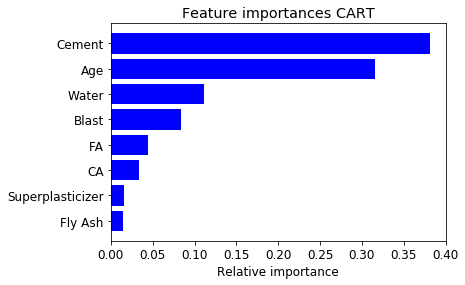


 Feature importances from model RF

[(0.34626198534635017, 'Cement'), (0.07518123316842915, 'Blast'), (0.01753290465079369, 'Fly Ash'), (0.08072639917503102, 'Water'), (0.07394815462311927, 'Superplasticizer'), (0.03488925865229099, 'CA'), (0.039941661519160634, 'FA'), (0.33151840286482515, 'Age')]


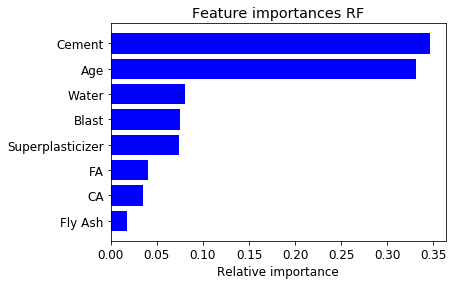

In [45]:
feature_importances('CART',lm_CART, lm_CART.feature_importances_)  
feature_importances('RF',lm_RF, lm_RF.feature_importances_)  

In [46]:
feature_names = ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer','CA', 'FA', 'Age']

In [47]:
print('\n Feature Permutation importances from model %s\n' % 'KNN')
    
permuted = PermutationImportance(lm_KNN, random_state = seed).fit(X, y.values)
eli5.show_weights(permuted, feature_names = feature_names)


 Feature Permutation importances from model KNN



Weight,Feature
0.8988 ± 0.1329,Cement
0.4388 ± 0.0233,Blast
0.3989 ± 0.0373,Age
0.2231 ± 0.0336,Fly Ash
0.1636 ± 0.0390,FA
0.1513 ± 0.0314,CA
0.0166 ± 0.0052,Water
0.0013 ± 0.0007,Superplasticizer


In [48]:
print('\n Feature Permutation importances from model %s\n' % 'SVR')
    
permuted = PermutationImportance(lm_SVR, random_state = seed).fit(X, y.values)
eli5.show_weights(permuted, feature_names = feature_names)


 Feature Permutation importances from model SVR



Weight,Feature
1.8622 ± 0.1527,Cement
1.0118 ± 0.0565,Blast
0.5392 ± 0.0358,Fly Ash
0.4929 ± 0.0609,Age
0.1436 ± 0.0095,FA
0.0672 ± 0.0194,CA
0.0225 ± 0.0084,Water
0.0124 ± 0.0045,Superplasticizer


In [49]:
print('\n Feature Permutation importances from model %s\n' % 'GB')
    
permuted = PermutationImportance(lm_GB, random_state = seed).fit(X, y.values)
eli5.show_weights(permuted, feature_names = feature_names)


 Feature Permutation importances from model GB



Weight,Feature
0.7454 ± 0.0413,Age
0.6355 ± 0.0238,Cement
0.2423 ± 0.0196,Water
0.1431 ± 0.0141,Blast
0.0378 ± 0.0037,FA
0.0332 ± 0.0036,Superplasticizer
0.0154 ± 0.0012,CA
0.0034 ± 0.0008,Fly Ash


In [50]:
print('\n Feature Permutation importances from model %s\n' % 'ANN')
    
permuted = PermutationImportance(lm_ANN, random_state = seed).fit(X, y.values)
eli5.show_weights(permuted, feature_names = feature_names)


 Feature Permutation importances from model ANN



Weight,Feature
0.0222 ± 0.0048,Cement
0.0146 ± 0.0030,Age
0.0022 ± 0.0017,Blast
0.0011 ± 0.0008,Superplasticizer
0.0008 ± 0.0006,Water
0.0003 ± 0.0006,Fly Ash
-0.0003 ± 0.0015,CA
-0.0007 ± 0.0014,FA


Permutation Importance works for many scikit-learn estimators. It shuffle the data and the removes different input variables to see what relative change results in the calculating the training model. It measures how much the outcome goes up or down given the input variable, thus calculating their impact on the results.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [51]:
print('\nOther Non Linear Models\n')

report_rmse_mape(lm_CART, y_test, X_test, \
                 'The model performance for testing set - \nCART regression')
report_rmse_mape(lm_RF, y_test, X_test,   \
                 'The model performance for testing set - \nRandom forest regression')
report_rmse_mape(lm_GB, y_test, X_test,   \
                 'The model performance for testing set - \nGradient Boosting regression')
report_rmse_mape(lm_SVR, y_test, X_test,  \
                 'The model performance for testing set - \nSVR regression')
report_rmse_mape(lm_KNN, y_test, X_test,  \
                 'The model performance for testing set - \nKNN regression')
report_rmse_mape(lm_ANN, y_test, X_test,  \
                 'The model performance for testing set - \nANN regression')


Other Non Linear Models



The model performance for testing set - 
CART regression
--------------------------------------
RMSE is 7.416879667680633
MAPE is 15.680432419912322


The model performance for testing set - 
Random forest regression
--------------------------------------
RMSE is 6.150536680671961
MAPE is 14.790039862335297


The model performance for testing set - 
Gradient Boosting regression
--------------------------------------
RMSE is 5.652167113133885
MAPE is 14.330447411791466


The model performance for testing set - 
SVR regression
--------------------------------------
RMSE is 11.04773122975129
MAPE is 31.98790281471063


The model performance for testing set - 
KNN regression
--------------------------------------
RMSE is 8.641986776019342
MAPE is 26.253752745821707


The model performance for testing set - 
ANN regression
--------------------------------------
RMSE is 17.008056325246685
MAPE is 64.53944050255772
